<a href="https://colab.research.google.com/github/asimoya99/Computer-Vision/blob/master/Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb


Using TensorFlow backend.


In [2]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
import numpy as np
#create an all  zero matrix shape len(sequences)
#set specific indices of results to 1s
def vectorize_sequeunces(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1      
  return results

In [0]:
x_train  = vectorize_sequeunces(train_data)
x_test = vectorize_sequeunces(test_data)

In [0]:
# straight way to vectorise the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


In [0]:
model = Sequential()
model.add(Dense(16, activation='relu',input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#compile the model
model.compile(optimizer = 'rmsprop',loss = 'binary_entropy', metrics = ['accuracy'])

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'binary_entropy', metrics = ['accuracy'] )


In [0]:
# using custom losses and metrics
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer= RMSprop(lr = 0.001),loss = losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [0]:
# setting aside a validation set 
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
# training the model
model.compile(optimizer='rmsprop',loss= 'binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512, validation_data=(x_val,y_val))

In [0]:
import matplotlib.pyplot as plt


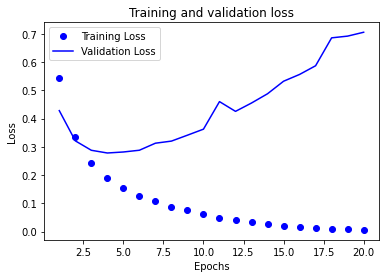

In [40]:
history_dict = history.history
loss_values = history_dict['loss']
acc = history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs,loss_values,'bo',label = 'Training Loss') # bo blue dot
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

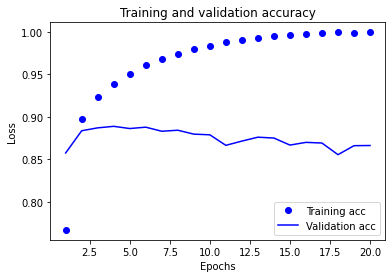

In [44]:
# clear  the figure
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values, 'bo',label = 'Training acc')
plt.plot(epochs,val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
# train a new model from scratch and test with 4 epochs
model = Sequential()
model.add(Dense(16, activation='relu',input_shape = (10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [47]:

model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


ERROR! Session/line number was not unique in database. History logging moved to new session 64
Epoch 1/4
49/49 [==============================] - 1s 24ms/step - loss: 0.4727 - accuracy: 0.8151
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2658 - accuracy: 0.9076
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2029 - accuracy: 0.9282
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2924 - accuracy: 0.8848


In [48]:
results

[0.2923639118671417, 0.8847600221633911]

In [49]:
model.predict(x_test)

array([[0.19316709],
       [0.99921346],
       [0.8298186 ],
       ...,
       [0.10073403],
       [0.05929482],
       [0.53698033]], dtype=float32)

In [0]:
# experimenting with the data 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(32, activation='tanh',input_shape= (10000,)))
model.add(Dense(32,activation='tanh'))
model.add(Dense(32, activation='softmax'))
model.add(Dense(1))

In [0]:
model.compile(optimizer='rmsprop',loss= 'mse',metrics=['acc'])

In [58]:
model.fit(partial_x_train, partial_y_train,epochs=20, batch_size=20, validation_data=(x_val,y_val))

Epoch 1/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1236 - acc: 0.8201 - val_loss: 0.0882 - val_acc: 0.8763
Epoch 2/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0621 - acc: 0.9186 - val_loss: 0.0840 - val_acc: 0.8874
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.0469 - acc: 0.9409 - val_loss: 0.0903 - val_acc: 0.8807
Epoch 4/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0374 - acc: 0.9525 - val_loss: 0.0962 - val_acc: 0.8770
Epoch 5/20
750/750 [==============================] - 5s 7ms/step - loss: 0.0306 - acc: 0.9623 - val_loss: 0.1008 - val_acc: 0.8753
Epoch 6/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0266 - acc: 0.9671 - val_loss: 0.1075 - val_acc: 0.8691
Epoch 7/20
750/750 [==============================] - 6s 7ms/step - loss: 0.0227 - acc: 0.9717 - val_loss: 0.1053 - val_acc: 0.8704
Epoch 8/20
750/750 [==============================] - 6s 7ms/step - loss: 0.

In [0]:
history_dict = history.history

In [60]:
history_dict

{'acc': [0.7667333483695984,
  0.897266685962677,
  0.9233333468437195,
  0.9387333393096924,
  0.9502000212669373,
  0.9608666896820068,
  0.9675999879837036,
  0.974399983882904,
  0.9800000190734863,
  0.984000027179718,
  0.9887333512306213,
  0.990066647529602,
  0.9933333396911621,
  0.9955333471298218,
  0.9963333606719971,
  0.9970666766166687,
  0.998199999332428,
  0.999666690826416,
  0.9993333220481873,
  0.9994000196456909],
 'loss': [0.5452641844749451,
  0.33359959721565247,
  0.24138039350509644,
  0.19055293500423431,
  0.15391725301742554,
  0.12642870843410492,
  0.10648378729820251,
  0.0881325751543045,
  0.07470694184303284,
  0.06135645881295204,
  0.048743389546871185,
  0.04119831696152687,
  0.0324050709605217,
  0.02499268762767315,
  0.020903566852211952,
  0.017027050256729126,
  0.012412951327860355,
  0.0077579440549016,
  0.007344628218561411,
  0.005757024046033621],
 'val_acc': [0.8574000000953674,
  0.8835999965667725,
  0.8870000243186951,
  0.888800

In [0]:
#